In [30]:
import pymysql
#连接数据库
db = pymysql.connect(host="rm-uf6ua72q394fq6v9q9o.mysql.rds.aliyuncs.com",port=3306,user="data_analyse",password="et_data_analyse",database="ccnu_main_test",charset="utf8")
#使用cursor()方法创建一个游标对象
cursor = db.cursor()
#cursor=pymysql.cursors.DictCursor

#计算机学院
sql='''
select username,creator_id,department_name,count(creator_id)
from et_data_learn
where department_name='计算机学院'
group by creator_id;
'''
#使用execute()方法执行SQL语句
cursor.execute(sql)
data = cursor.fetchall()
print(data)

#关闭游标和数据库的连接
cursor.close()
db.close()


(('73955', 0, '计算机学院', 2), ('cens ', 73955, '计算机学院', 3), ('2018214851', 73956, '计算机学院', 3), ('大学生学报', 73959, '计算机学院', 3), ('73956', 2018214851, '计算机学院', 1))


<BarContainer object of 5 artists>

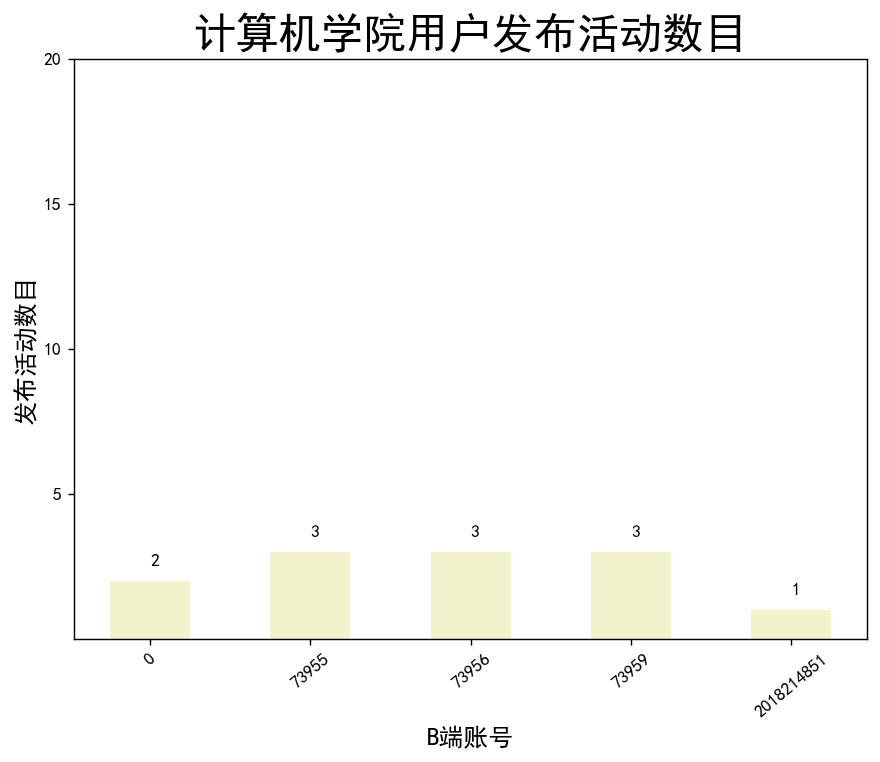

In [39]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
#折线图和柱形图

user=[]
activity_number=[]
#活动数目列表
for d in data:
    user.append(d[1])
    activity_number.append(d[3])
fig=plt.figure(dpi=128,figsize=(8,6))
axes=plt.subplot(111)
xlist=list(range(len(user)))#活动id编号，创建整数列表

plt.title("计算机学院用户发布活动数目",fontsize=24)
plt.xlabel("B端账号",fontsize=14)#设置轴的名称
plt.xticks(rotation=40)# x轴标签竖直
plt.ylabel("发布活动数目",fontsize=14)
plt.ylim(0,20)#设置y值界限

#text()添加数据标签
for x,y in zip(xlist,activity_number):
    axes.text(x,y+0.5,'%.0f'%y)
axes.set_xticks(xlist)
axes.set_yticks([5,10,15,20])
axes.set_xticklabels(user)#自定义刻度标签
axes.bar(xlist,activity_number,alpha=0.2, width=0.5,color='y')

